典型无监督学习算法：
 - 聚类算法
    - K-means快速聚类
    - 小批量快速聚类（Mini Batch K-means）
    - BDSCAN基于密度的聚类
 - 关联规则算法

# K-Means
对数据集进行指定类别数量分群的聚类算法，也是目前常用的一类聚类算法

基本流程：
- 创建初始中心点
- 依据中心点，对数据进行类别划分

迭代：
1. 确定中心点，第一轮随机生成，其他通过质心计算得到
2. 根据中心点，计算每个点到中心点的距离
3. 根据距离计算结果，对数据集进行划分

迭代停止条件（两个等价条件）：
1. 相邻两次迭代过程中质心位置不发生变化
2. 相邻两次迭代过程中各点所属类别不发生变化

迭代停止相当于模型收敛了

In [1]:
from ML_basic_function import *
import numpy as np

In [2]:
np.random.seed(23)
X,y = arrayGenCla(num_examples=20,num_inputs=2,num_class=2,deg_dispersion=[2,0.5])

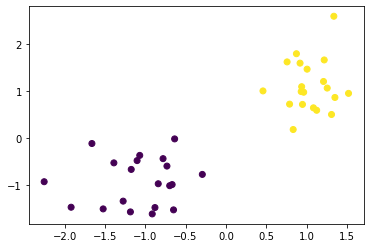

In [3]:
plt.scatter(X[:,0],X[:,1],c=y)

In [4]:
np.random.seed(23)
center = np.random.randn(2,2)
center

array([[ 0.66698806,  0.02581308],
       [-0.77761941,  0.94863382]])

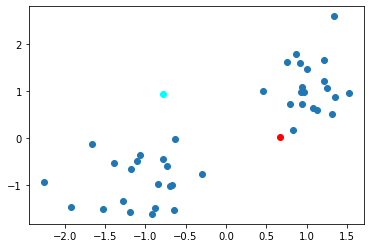

In [5]:
plt.scatter(X[:,0],X[:,1])
plt.plot(center[0,0],center[0,1],'o',c='red') # 令第一个点为红色
plt.plot(center[1,0],center[1,1],'o',c='cyan') # 令第一个点为蓝色

In [6]:
# 计算每条样本距离红色中心点距离
np.power((X - center[0]), 2).sum(1)

array([2.80418598, 4.53045247, 4.13895531, 5.96788755, 5.43938343,
       3.865367  , 3.25889336, 7.13376456, 2.30412925, 8.92312473,
       3.37863704, 2.33823889, 4.64766873, 3.16445859, 5.17815242,
       1.55545174, 1.69836706, 5.6316741 , 9.43394061, 2.93573695,
       2.1952354 , 1.68759248, 0.99370862, 1.5880287 , 0.50250126,
       1.21754799, 1.4285248 , 0.052919  , 0.64128333, 2.52979672,
       0.53203112, 1.17477822, 2.55720201, 7.04514128, 1.0019926 ,
       2.98793165, 3.17855917, 0.55893052, 1.00322863, 0.55888205])

In [7]:
# 对比距离中心点远近情况
res_bool = np.power((X - center[0]),2).sum(1) < np.power((X - center[1]),2).sum(1)
res_bool

array([ True, False,  True,  True, False, False,  True, False, False,
       False, False,  True,  True, False,  True,  True, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [8]:
res = res_bool*1
res
# 1 代表该样本距离红色中心点更近，应该属于红色点
# 0 代表该样本距离蓝色中心点更近，应该属于蓝色点

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [9]:
# 选择红色点簇
X_red = X[(res_bool)]
X_red

array([[-0.66650597, -0.98709346],
       [-0.6491641 , -1.52554078],
       [-1.18377406, -1.56872985],
       [-0.83886424, -0.96982853],
       [-0.73091902, -0.59394067],
       [-0.87944685, -1.47625477],
       [-0.91318318, -1.61162739],
       [-0.29234001, -0.77114451],
       [-0.69690225, -1.01126945],
       [ 1.00671113,  1.46797245],
       [ 1.21031133,  1.20580982],
       [ 0.96433804,  0.97728121],
       [ 1.52044299,  0.95298263],
       [ 0.78957802,  0.72400572],
       [ 0.93945123,  1.09507068],
       [ 1.2560687 ,  1.06576923],
       [ 0.83419144,  0.18380686],
       [ 1.30955704,  0.50371311],
       [ 0.91932681,  1.59620217],
       [ 1.12536828,  0.59319188],
       [ 1.35181182,  0.86592893],
       [ 0.75872026,  1.62230524],
       [ 1.33843006,  2.59375134],
       [ 0.45971762,  1.00511465],
       [ 1.21891484,  1.66389381],
       [ 0.87442748,  1.79655531],
       [ 1.08540885,  0.64537305],
       [ 0.9334877 ,  0.99132153],
       [ 0.94945354,

In [10]:
# 选取蓝色点簇 ~否运算
X_blue = X[(~res_bool)]
X_blue

array([[-1.38880971, -0.52568309],
       [-1.66107376, -0.11387086],
       [-1.1737295 , -0.66492992],
       [-1.521725  , -1.50497094],
       [-0.77913181, -0.43556157],
       [-1.91903388, -1.46938432],
       [-1.10092026, -0.47731436],
       [-1.06813338, -0.3663759 ],
       [-0.63556208, -0.01578263],
       [-1.273894  , -1.33970914],
       [-2.25311516, -0.92651975]])

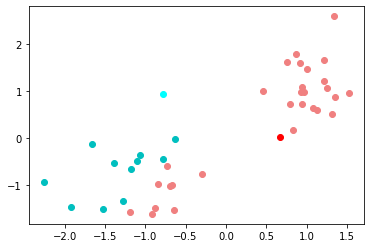

In [11]:
plt.plot(X_red[:,0],X_red[:,1],'o',c='lightcoral')
plt.plot(center[0,0], center[0,1], 'o', c='red')
plt.plot(X_blue[:,0], X_blue[:,1], 'o', c='c')
plt.plot(center[1,0], center[1,1], 'o', c='cyan')

In [12]:
# 重新计算中心点（以划分簇的质心）
X_red.mean(0),X_blue.mean(0)

(array([0.48257302, 0.40526208]), array([-1.3431935 , -0.71273659]))

In [13]:
center = np.array([X_red.mean(0),X_blue.mean(0)])
center

array([[ 0.48257302,  0.40526208],
       [-1.3431935 , -0.71273659]])

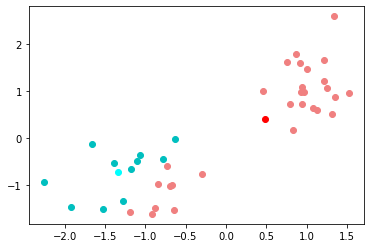

In [14]:
plt.plot(X_red[:,0],X_red[:,1],'o',c='lightcoral')
plt.plot(center[0,0], center[0,1], 'o', c='red')
plt.plot(X_blue[:,0], X_blue[:,1], 'o', c='c')
plt.plot(center[1,0], center[1,1], 'o', c='cyan')

In [15]:
# 第二次迭代

In [16]:
# 距离计算结果
res_bool = np.power((X - center[0]),2).sum(1) < np.power((X - center[1]),2).sum(1)
res = res_bool*1

In [17]:
# 新的簇的划分
X_red = X[(res_bool)]
X_blue = X[(~res_bool)]

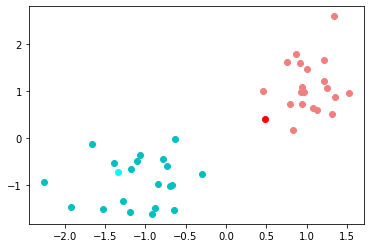

In [18]:
# 展示划分结果
plt.plot(X_red[:,0],X_red[:,1],'o',c='lightcoral')
plt.plot(center[0,0], center[0,1], 'o', c='red')
plt.plot(X_blue[:,0], X_blue[:,1], 'o', c='c')
plt.plot(center[1,0], center[1,1], 'o', c='cyan')

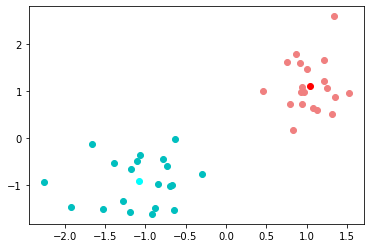

In [19]:
center = np.array([X_red.mean(0),X_blue.mean(0)])
plt.plot(X_red[:,0],X_red[:,1],'o',c='lightcoral')
plt.plot(center[0,0], center[0,1], 'o', c='red')
plt.plot(X_blue[:,0], X_blue[:,1], 'o', c='c')
plt.plot(center[1,0], center[1,1], 'o', c='cyan')

In [20]:
# 第三轮迭代

In [21]:
# 距离计算结果
res_bool = np.power((X - center[0]),2).sum(1) < np.power((X - center[1]),2).sum(1)
res = res_bool*1

In [22]:
# 新的簇的划分
X_red = X[(res_bool)]
X_blue = X[(~res_bool)]

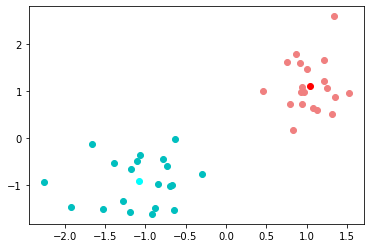

In [23]:
# 展示划分结果
plt.plot(X_red[:,0],X_red[:,1],'o',c='lightcoral')
plt.plot(center[0,0], center[0,1], 'o', c='red')
plt.plot(X_blue[:,0], X_blue[:,1], 'o', c='c')
plt.plot(center[1,0], center[1,1], 'o', c='cyan')

In [24]:
# 分类结果没变，达到模型收敛条件

# K-Means快速聚类的背后的数学意义

在给定簇的个数 K 的情况下，找到一个最优的划分情况，使得组内误差平方和尽可能的小。


组内误差平方和：每个点到当前簇的中心点的距离的平方和
（预测值和真实值的距离）

$SSE = \sum_{i=1}^K \sum_{x\in{C_i}}{(c_i - x)^2}$

中心点、质心 也叫 `原型`，通过原型代表一个簇中的点

In [25]:
# 第一轮SSE
# 确定中心点
np.random.seed(23)
center = np.random.randn(2,2)

# 计算距离
res_bool = np.power((X - center[0]),2).sum(1) < np.power((X - center[1]),2).sum(1)
res = res_bool*1

# 划分数据集
X_red = X[(res_bool)]
X_blue = X[(~res_bool)]

# 计算SSE
np.power((X_red - center[0]), 2).sum()

66.26098649489376

In [26]:
# 第二轮SSE
# 确定中心点
center = np.array([X_red.mean(0), X_blue.mean(0)])

# 计算距离
res_bool = np.power((X - center[0]),2).sum(1) < np.power((X - center[1]),2).sum(1)
res = res_bool*1

# 划分数据集
X_red = X[(res_bool)]
X_blue = X[(~res_bool)]

# 计算SSE
np.power((X_red - center[0]), 2).sum()

23.256673490142994

In [27]:
# 第三轮SSE
# 确定中心点
center = np.array([X_red.mean(0), X_blue.mean(0)])

# 计算距离
res_bool = np.power((X - center[0]),2).sum(1) < np.power((X - center[1]),2).sum(1)
res = res_bool*1

# 划分数据集
X_red = X[(res_bool)]
X_blue = X[(~res_bool)]

# 计算SSE
np.power((X_red - center[0]), 2).sum()

6.961875790042418

# K-Means快速聚类的sklearn的实现方法

In [28]:
from sklearn.cluster import KMeans

In [29]:
KMeans?

Init signature:
KMeans(
    n_clusters=8,
    *,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=0.0001,
    precompute_distances='deprecated',
    verbose=0,
    random_state=None,
    copy_x=True,
    n_jobs='deprecated',
    algorithm='auto',
)
Docstring:     
K-Means clustering.

Read more in the :ref:`User Guide <k_means>`.

Parameters
----------

n_clusters : int, default=8
    The number of clusters to form as well as the number of
    centroids to generate.

init : {'k-means++', 'random', ndarray, callable}, default='k-means++'
    Method for initialization:

    'k-means++' : selects initial cluster centers for k-mean
    clustering in a smart way to speed up convergence. See section
    Notes in k_init for more details.

    'random': choose `n_clusters` observations (rows) at random from data
    for the initial centroids.

    If an ndarray is passed, it should be of shape (n_clusters, n_features)
    and gives the initial centers.

    If a callable is passe

K-Means 在面对复杂数据集时，可能会陷入：
- 局部最小值陷阱

    有更好的划分数据集的方法（SSE更小），但根据收敛条件无法达到
- 震荡收敛

    算法会在两种不同的划分方法中来回震荡

In [30]:
km = KMeans(n_clusters=2)
km.fit(X)

KMeans(n_clusters=2)

In [31]:
# 查看中心点
km.cluster_centers_

array([[ 1.04228586,  1.11340149],
       [-1.08131141, -0.91777659]])

In [32]:
# 查看每条数据属于哪一类
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

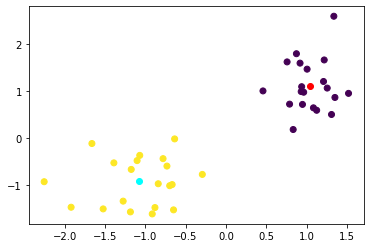

In [33]:
# 借助图像进行验证
plt.scatter(X[:,0],X[:,1],c=km.labels_)
plt.plot(km.cluster_centers_[0,0],km.cluster_centers_[0,1],'o',c='red')
plt.plot(km.cluster_centers_[1,0],km.cluster_centers_[1,1],'o',c='cyan')

In [34]:
# 收敛时SSE
km.inertia_

16.352095518854334

In [35]:
# 迭代次数
km.n_iter_

2

In [36]:
# K-Means评估器也支持predict方法
X_new = np.random.randn(2,2)
km.predict(X_new)

array([1, 1], dtype=int32)

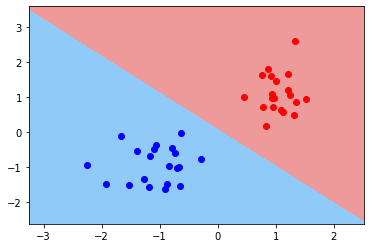

In [37]:
def plot_decision_boundary(X, y, model):
    """
    决策边界绘制函数
    """
    
    # 以两个特征的极值+1/-1作为边界，并在其中添加1000个点
    x1, x2 = np.meshgrid(np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 1000).reshape(-1,1),
                         np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 1000).reshape(-1,1))
    
    # 将所有点的横纵坐标转化成二维数组
    X_temp = np.concatenate([x1.reshape(-1, 1), x2.reshape(-1, 1)], 1)
    
    # 对所有点进行模型类别预测
    yhat_temp = model.predict(X_temp)
    yhat = yhat_temp.reshape(x1.shape)
    
    # 绘制决策边界图像
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#90CAF9'])
    plt.contourf(x1, x2, yhat, cmap=custom_cmap)
    plt.scatter(X[(y == 0).flatten(), 0], X[(y == 0).flatten(), 1], color='red')
    plt.scatter(X[(y == 1).flatten(), 0], X[(y == 1).flatten(), 1], color='blue')
    
plot_decision_boundary(X,km.labels_,km)

# 轮廓系数 silhouette coefficient (SC)
超参数K的取值参考

轮廓系数的计算结果
1. 对于第i条数据，计算该对象到所属簇的平均距离，记为ai
2. 如果还存在其他簇，计算该对象到这些簇的所有点的平均距离，并在这些距离中找到最小值记为bi
3. 则对于i，轮廓系数计算结果为：$s_i = \frac{b_i - a_i}{max(a_i b_i)}$
4. 对于聚类中的所有N条数据，最终轮廓系数为单个si的均值，即$s = mean(s_i)$

- 尽管轮廓系数可以在[-1,1]区间内取值，
- 但我们并不希望轮廓系数出现负值，此时代表组内的平均距离要大于组外平均距离的最小值，此时说明聚类算法无效。
- 我们希望bi > ai，并且希望ai尽可能的小，此时si也就趋近于1
- 当轮廓系数趋于0时，说明各簇重叠现象明显


轮廓系数取值的大小一定程度上能够给K的取值提供建议，当
`轮廓系数比较大`时，往往说明数据在特征空间中本身的分布情况就和聚类的类别数量相同

> 和SSE不同，轮廓系数受到K的影响相对较小，这也是轮廓系数相对可靠的原因之一

In [38]:
from sklearn.metrics import silhouette_score

In [39]:
silhouette_score(X,km.labels_) # 输入数据和类别

0.7241755028408805

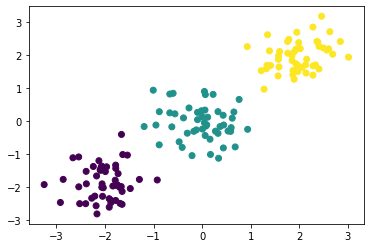

In [44]:
np.random.seed(23)
X,y = arrayGenCla(num_examples=50,num_inputs=2,num_class=3,deg_dispersion=[2,0.5])
plt.scatter(X[:,0],X[:,1],c=y)

In [45]:
ss = []

for i in range(2,12):
    km = KMeans(n_clusters=i).fit(X)
    ss.append(silhouette_score(X,km.labels_))

In [46]:
ss

[0.5917969390803755,
 0.6753180189915984,
 0.580872808406484,
 0.47687683047050644,
 0.3685113521594095,
 0.36538208299620134,
 0.36399950542730486,
 0.3524637605205039,
 0.3579462241667135,
 0.3682450219445942]

In [47]:
# ss[1]的轮廓系数值较大，则K取值为3

In [48]:
# 除非特征矩阵在特征空间的“分界”非常明显，才能在轮廓系数上有明显差异。而聚类算法在分类上的性能，其实也远远弱于有监督学习算法

# Mini Batch K-Means 与 DBSCAN 密度聚类
分别在速度、性能上的互补

In [50]:
# 科学计算模块
import numpy as np
import pandas as pd

# 绘图模块
import matplotlib as mpl
import matplotlib.pyplot as plt

# 自定义模块
from ML_basic_function import *

# K-Means
from sklearn.cluster import KMeans

# 一、 Mini Batch K-Means

在K-Means基础上增加了一个Mini Batch的抽样过程，并且每轮迭代中心点时，不再带入全部数据、而是带入抽样的Mini Batch进行计算。即每一轮的迭代操作更新为：
1. 从数据集中随机抽取一些数据形成小批量，把他们分配给最近的质心
2. 根据小批量数据划分情况，更新质心

牺牲 `精度` 换取 `效率`

MiniBatchKMeans 和 K- Means 在参数设置上的差异：
1. 迭代收敛条件： MiniBatchKMeans不用‘tol’，而是主要通过`max_no_improvement`和`max_iter`
2. 控制结果精度： 通过`reassignment_ratio`

In [51]:
from sklearn.cluster import MiniBatchKMeans

In [52]:
MiniBatchKMeans?

Init signature:
MiniBatchKMeans(
    n_clusters=8,
    *,
    init='k-means++',
    max_iter=100,
    batch_size=100,
    verbose=0,
    compute_labels=True,
    random_state=None,
    tol=0.0,
    max_no_improvement=10,
    init_size=None,
    n_init=3,
    reassignment_ratio=0.01,
)
Docstring:     
Mini-Batch K-Means clustering.

Read more in the :ref:`User Guide <mini_batch_kmeans>`.

Parameters
----------

n_clusters : int, default=8
    The number of clusters to form as well as the number of
    centroids to generate.

init : {'k-means++', 'random'} or ndarray of shape             (n_clusters, n_features), default='k-means++'
    Method for initialization

    'k-means++' : selects initial cluster centers for k-mean
    clustering in a smart way to speed up convergence. See section
    Notes in k_init for more details.

    'random': choose k observations (rows) at random from data for
    the initial centroids.

    If an ndarray is passed, it should be of shape (n_clusters, n_fe

In [54]:
mbk = MiniBatchKMeans(n_clusters=2)

In [55]:
np.random.seed(23)
X,y = arrayGenCla(num_examples = 20,num_inputs=2,num_class=2,deg_dispersion=[2,0.5])

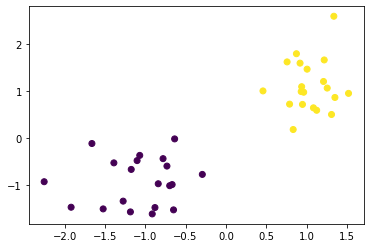

In [56]:
plt.scatter(X[:,0],X[:,1],c=y)

In [57]:
mbk.fit(X)

MiniBatchKMeans(n_clusters=2)

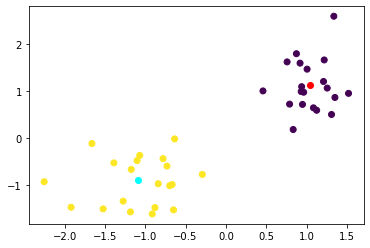

In [58]:
# 观察聚类结果
plt.scatter(X[:,0],X[:,1],c=mbk.labels_)
plt.plot(mbk.cluster_centers_[0,0],mbk.cluster_centers_[0,1],'o',c='red')
plt.plot(mbk.cluster_centers_[1,0],mbk.cluster_centers_[1,1],'o',c='cyan')

In [59]:
np.random.seed(23)
X,y = arrayGenCla(num_examples = 1000000,num_inputs=10,num_class=5,deg_dispersion=[4,1])

In [60]:
km = KMeans(n_clusters=5,max_iter=1000)
mbk = MiniBatchKMeans(n_clusters=5,max_iter=1000)

In [61]:
# 导入时间模块
import time

In [62]:
# K-Means聚类用时
t0 = time.time()
km.fit(X)
t_batch = time.time() - t0
t_batch

37.74519324302673

In [63]:
# MiniBatchKMeans聚类用时
t0 = time.time()
mbk.fit(X)
t_batch = time.time() - t0
t_batch

23.10051202774048

In [64]:
# 二者 SSE 精度

In [65]:
km.inertia_

49994316.22276671

In [66]:
mbk.inertia_

50166895.159873486

In [67]:
# MiniBatchKMeans 精度低于 KMeans,但整体结果相差不大，基本可以忽略不计

如果希望进一步提高迭代速度，可以适当减少 batch_size、reassignment_ratio、max_no_improvement 这三个参数，代价是聚类的精度可能会进一步降低，而如果希望提高精度，则可以提升 reassignment_ratio 参数，不过相应的，运行时间会有所增加。

# 二、DBSCAN
MiniBatchKMeans 和 K-Means 聚类都假设簇的边界是`凸型`的。
对于非规则类边界，则无法进行较好的聚类

In [80]:
from sklearn.datasets import make_moons

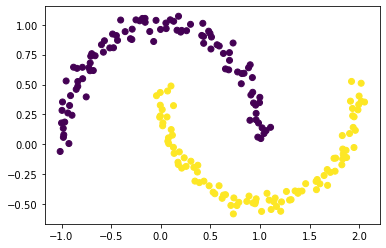

In [81]:
X,y = make_moons(200,noise=0.05,random_state=24)
plt.scatter(X[:,0],X[:,1],c=y)

KMeans 聚类认为：更接近同一中心点的数据属于同一个簇，而上图显然例外

In [82]:
km = KMeans(n_clusters=2)
km.fit(X)

KMeans(n_clusters=2)

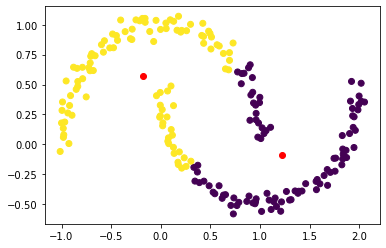

In [83]:
plt.scatter(X[:,0],X[:,1],c=km.labels_)
plt.plot(km.cluster_centers_[:,0],km.cluster_centers_[:,1],'ro')

DBSCAN 基本原理：
对一个点：以该点为中心画圆，半径为 eps,圆内的数据量为 num_samples。eps 越小，num_samples 越大，则该点所在区域密度越高

根据密度将数据点分为：`核心点`和`边界点`和`噪声点`

将临近的（联通、圆相交，1个eps内）核心点划为一个簇，将边界点划归到邻近的核心点所在簇，抛弃噪声点

In [84]:
from sklearn.cluster import DBSCAN

In [85]:
DBSCAN?

Init signature:
DBSCAN(
    eps=0.5,
    *,
    min_samples=5,
    metric='euclidean',
    metric_params=None,
    algorithm='auto',
    leaf_size=30,
    p=None,
    n_jobs=None,
)
Docstring:     
Perform DBSCAN clustering from vector array or distance matrix.

DBSCAN - Density-Based Spatial Clustering of Applications with Noise.
Finds core samples of high density and expands clusters from them.
Good for data which contains clusters of similar density.

Read more in the :ref:`User Guide <dbscan>`.

Parameters
----------
eps : float, default=0.5
    The maximum distance between two samples for one to be considered
    as in the neighborhood of the other. This is not a maximum bound
    on the distances of points within a cluster. This is the most
    important DBSCAN parameter to choose appropriately for your data set
    and distance function.

min_samples : int, default=5
    The number of samples (or total weight) in a neighborhood for a point
    to be considered as a core point. T

In [86]:
# 实例化模型
DB = DBSCAN(eps=0.3,min_samples=10)

In [87]:
# 训练模型
DB.fit(X)

DBSCAN(eps=0.3, min_samples=10)

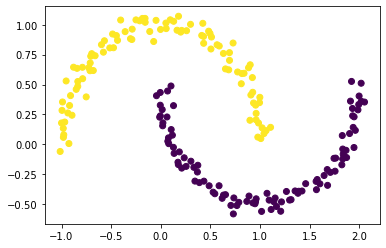

In [88]:
# 查看聚类结果
plt.scatter(X[:,0],X[:,1],c=DB.labels_)

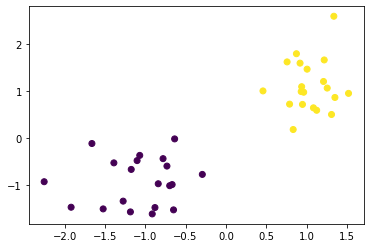

In [89]:
np.random.seed(23)
X,y = arrayGenCla(num_examples = 20,num_inputs=2,num_class=2,deg_dispersion=[2,0.5])
plt.scatter(X[:,0],X[:,1],c=y)

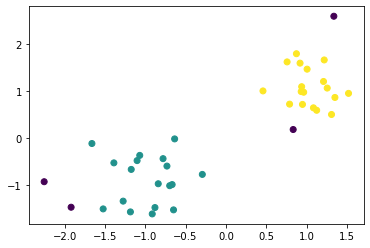

In [90]:
DB = DBSCAN(eps=0.5,min_samples=5).fit(X)
plt.scatter(X[:,0],X[:,1],c=DB.labels_)
# 紫色为噪声点 -1

In [91]:
DB.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1])

In [92]:
# 调整参数，噪声点变动

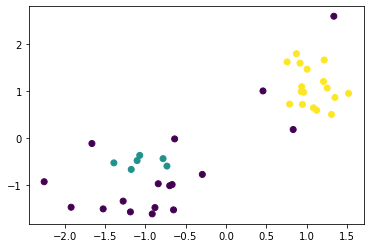

In [93]:
DB = DBSCAN(eps=0.4,min_samples=6).fit(X)
plt.scatter(X[:,0],X[:,1],c=DB.labels_)
# 紫色为噪声点 -1

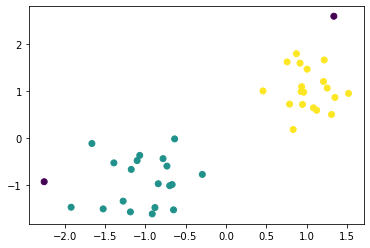

In [94]:
DB = DBSCAN(eps=0.6,min_samples=4).fit(X)
plt.scatter(X[:,0],X[:,1],c=DB.labels_)
# 紫色为噪声点 -1